In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def normal_vector(strike, dip):
    """ 
    Compute normal vector of plane from its strike and dip angles 
    """
    # Convert angles from degrees to radians
    strike_rad = np.radians(strike)
    dip_rad = np.radians(dip)
    
    # Calculate the components of the normal vector
    normal_x = -np.sin(dip_rad) * np.sin(strike_rad)
    normal_y = np.sin(dip_rad) * np.cos(strike_rad)
    normal_z = np.cos(dip_rad)
    
    normal = np.array([normal_x, normal_y, normal_z])

    return normal

In [156]:
normal_vector(204, 89)

array([ 0.4066747 , -0.91340632,  0.01745241])

In [11]:
def points_in_plane(X, normal, center):
    """
    Find the number of points in X that lie in the plane defined by normal vector and center point 
    """
    npoints = 0

    for i in range(len(X)):
        vec = X[i] - center

        if np.round(np.dot(vec, normal)) == 0:
            npoints = npoints + 1

    return npoints


In [52]:
# test
Y = np.array([[ -88.38921194,  -45.56193741,  -87.1648688 ], [ -96.55991131,  -50.6571121 ,  -85.8903464 ],
     [ -95.26032697,  -50.03098616,  -85.6657624 ],[ -89.45118381,  -47.14797454,  -77.6931242 ]])
center = [ -88.38921194,  -45.56193741,  -87.1648688 ]
v1 = Y[1] - Y[0]
v2 = Y[2] - Y[0]
normal = np.cross(v1, v2)
points_in_plane(Y, normal, center)

1

In [4]:
import random

In [12]:
#def points_in_orientation(X, normal, center_min, center_max, n_centers):
    #"""
    #Find the number of points in X that lie in planes defined by this normal vector
    #"""

    #dx = (center_max - center_min)/n_centers
    #npoints = 0

    #for i in range(n_centers):
        #center = (center_min + i * dx) * np.array([1,0,0])
        #npoints += points_in_plane(X,normal, center)
    
    #return npoints

def points_in_orientation(X, normal, n_centers):
    """
    Find the number of points in X that lie in planes defined by this normal vector
    """
    # Randomly select n_centers points in X to serve as plane points
    idx_centers = random.sample(range(len(X)), n_centers)
    centers = X[idx_centers]

    npoints = 0

    for i in range(n_centers):
        npoints = npoints + points_in_plane(X, normal, center)

    return npoints



In [13]:
def strike_dip_pairs(strike_min, strike_max, n_strikes, dip_min, dip_max, n_dips):
    """
    Find all the pairs of (strike,dip) angles 
    """
    dstrike = (strike_max - strike_min)/n_strikes
    ddip = (dip_max - dip_min)/n_dips

    strike_list = []
    dip_list = []

    for i in range(n_strikes):
        strike  = strike_min + i*dstrike
        strike_list.append(strike)

    for j in range(n_dips):
        dip  = dip_min + j*ddip
        dip_list.append(dip)

    # Generate all possible pairs (strike, dip)
    pairs = [(strike, dip) for strike in strike_list for dip in dip_list]

    return pairs



In [14]:
def orientation_distribution(X, strike_min, strike_max, n_strikes, dip_min, dip_max, n_dips, n_centers):
                             #center_min, center_max, n_centers):

    points_per_orientation = []

    pairs = strike_dip_pairs(strike_min, strike_max, n_strikes, dip_min, dip_max, n_dips)
    
    for strike, dip in pairs:
        normal = normal_vector(strike, dip)
        npoints = points_in_orientation(X, normal, n_centers)
        points_per_orientation.append(npoints)

    return pairs, points_per_orientation  

In [15]:
def plot_distribution(pairs, points_per_orientation):
    
    # Generate pair IDs
    pair_ids = [f"({strike}, {dip})" for strike, dip in pairs]

    # Plotting
    fig, ax = plt.subplots()
    ax.bar(pair_ids, points_per_orientation, color='skyblue')

    # Adding labels and title
    plt.xlabel('Orientation (strike and dip)')
    plt.ylabel('Number of points')
    plt.title('Number of points in each orientation')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Showing the plot
    plt.tight_layout()
    plt.show()

## Test on M0 dataset

In [5]:
import pandas as pd

In [66]:
# Import Bedretto M0 experiment provisional dataset 
catalog = pd.read_csv('seiscomp-exp-dd_20240415.csv')
catalog_xyz = catalog[['x', 'y', 'z']]
X = catalog_xyz.to_numpy()

In [67]:
# test on sample of X
# Randomly select indices
random_indices = np.random.choice(X.shape[0], 1000, replace=False)
# Select the points
selected_points = X[random_indices]

pairs_test, points_per_orientation_test = orientation_distribution(selected_points, 
                                                         strike_min = 0, 
                                                         strike_max = 360, 
                                                         n_strikes = 90, 
                                                         dip_min = 0, 
                                                         dip_max = 90, 
                                                         n_dips = 90,  
                                                         n_centers = 100)


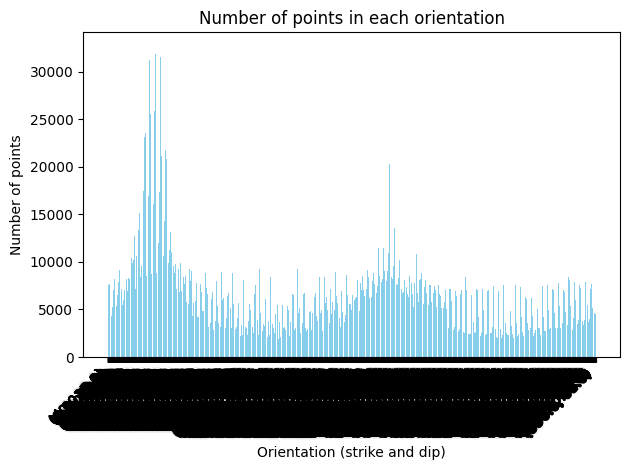

In [68]:
plot_distribution(pairs_test, points_per_orientation_test)

In [69]:
pairs, points_per_orientation = orientation_distribution(X, 
                                                         strike_min = 0, 
                                                         strike_max = 360, 
                                                         n_strikes = 90, 
                                                         dip_min = 0, 
                                                         dip_max = 90, 
                                                         n_dips = 90,  
                                                         n_centers = 100)

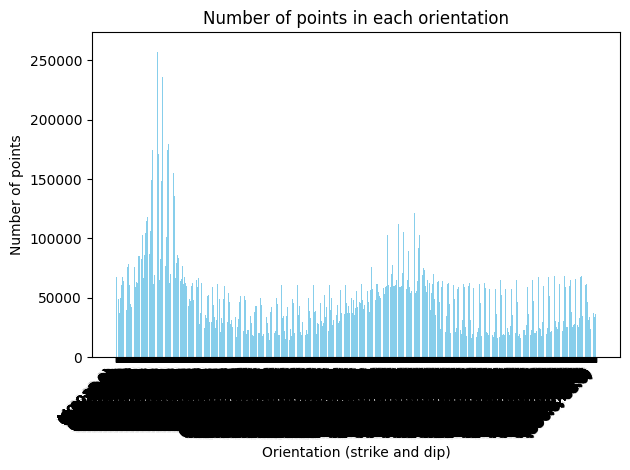

In [70]:
plot_distribution(pairs, points_per_orientation)

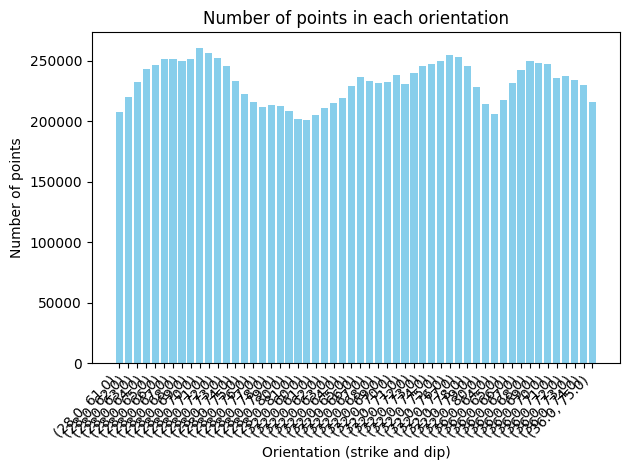

In [134]:
# Find indices where values are higher than 250000
ppo = np.array(points_per_orientation)
indices = np.where(ppo > 200000)[0]

selected_pairs = [pairs[i] for i in indices]
selected_ppo = [points_per_orientation[i] for i in indices]
plot_distribution(selected_pairs, selected_ppo)


In [112]:
len(indices)

21

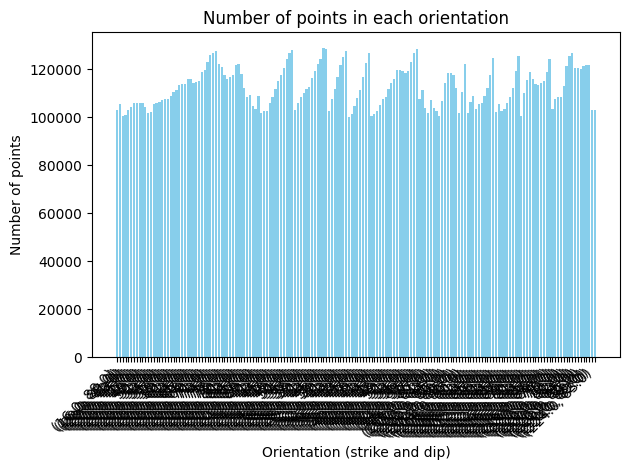

In [138]:
# Find indices where values are between 100000 and 130000
ppo = np.array(points_per_orientation)
indices = np.where((ppo > 100000) & (ppo < 130000))[0]

selected_pairs = [pairs[i] for i in indices]
selected_ppo = [points_per_orientation[i] for i in indices]
plot_distribution(selected_pairs, selected_ppo)

In [114]:
len(indices)

14

In [6]:
import plotly.graph_objs as go
import plotly.express as px

In [129]:
def plot_points_vs_pairs_plotly(points_per_orientation, orientation_pairs):
    # Combine points with their corresponding orientation pairs
    combined = list(zip(orientation_pairs, points_per_orientation))
    
    # Sort combined list by strike, then by dip
    combined_sorted = sorted(combined, key=lambda x: (x[0][0], x[0][1]))
    
    # Extract sorted orientation pairs and points
    sorted_orientation_pairs, sorted_points_per_orientation = zip(*combined_sorted)
    
    # Create a list of labels for the x-axis
    labels = [f"({strike}, {dip})" for strike, dip in sorted_orientation_pairs]
    
    # Create the plot
    fig = go.Figure(data=go.Scatter(x=labels, y=sorted_points_per_orientation, mode='lines+markers'))
    
    # Update layout for better readability
    fig.update_layout(
        title='Points per Orientation vs Orientation Pairs',
        xaxis_title='Orientation Pairs (strike, dip)',
        yaxis_title='Points per Orientation',
        xaxis=dict(tickmode='array', tickvals=labels),
        showlegend=False
    )
    
    fig.show()

In [135]:
# num > 200000
plot_points_vs_pairs_plotly(selected_ppo, selected_pairs)


In [139]:
# 100000 < num < 130000
plot_points_vs_pairs_plotly(selected_ppo, selected_pairs)

In [133]:
plot_points_vs_pairs_plotly(points_per_orientation, pairs)

### Orientation pairs "detected"
- strike = 28 [28,36], dip = 70 [64,77]            
- strike = 204 [204,220], dip = 89 [83,89]

## Test on synthetic dataset

In [7]:
# test on toy dataset with 3 planes, 2 orientations, 4k datapoints

toy = pd.read_csv('toy-2orientations-3planes.csv')
X_toy = toy[['x', 'y', 'z']].values
clusters_toy = toy['cluster'].values

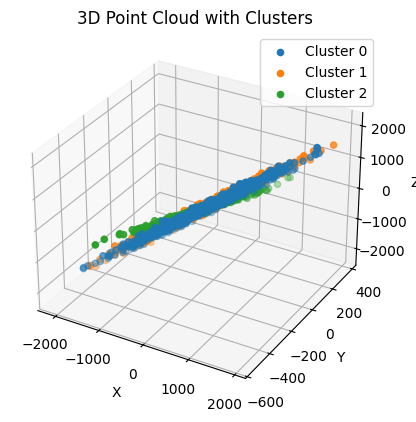

In [141]:
# Plotting the 3D points with cluster coloring
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unique clusters
unique_clusters = np.unique(clusters_toy)

# Plot each cluster with a different color
for cluster in unique_clusters:
    cluster_points = X_toy[clusters_toy == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud with Clusters')
ax.legend()

plt.show()

In [142]:
pairs_toy, points_per_orientation_toy = orientation_distribution(X_toy, 
                                                         strike_min = 0, 
                                                         strike_max = 360, 
                                                         n_strikes = 90, 
                                                         dip_min = 0, 
                                                         dip_max = 90, 
                                                         n_dips = 90,  
                                                         n_centers = 100)

In [143]:
plot_points_vs_pairs_plotly(points_per_orientation_toy, pairs_toy)

## Sphere representation

In [147]:
import mplstereonet
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [198]:
points_per_orientation = np.log(points_per_orientation)

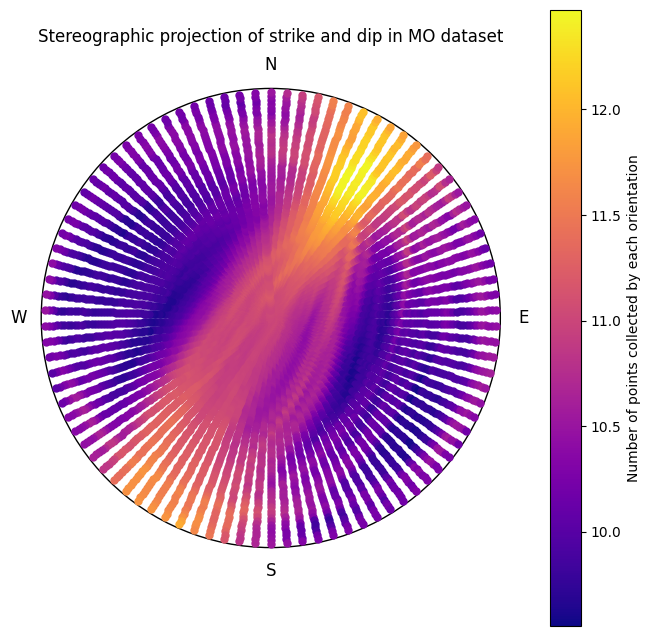

In [201]:
# Convert strike and dip to trend and plunge of poles
def convert_to_pole(strike, dip):
    #trend = np.radians(strike + 90)
    trend = np.radians(strike)
    plunge = np.radians(90 - dip)
    #plunge = np.radians(dip)
    return trend, plunge

# Stereographic projection of a point
def stereographic_projection(trend, plunge):
    x = np.tan(np.pi / 4 - plunge / 2) * np.sin(trend)
    y = np.tan(np.pi / 4 - plunge / 2) * np.cos(trend)
    return x, y

# Normalize the number of points for color mapping
points = np.array(points_per_orientation)
norm = Normalize(vmin=np.min(points), vmax=np.max(points))
cmap = plt.get_cmap('plasma')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the stereonet circle
circle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none')
ax.add_artist(circle)

# Plot the poles
for (strike, dip), point in zip(pairs, points_per_orientation):
    trend, plunge = convert_to_pole(strike, dip)
    x, y = stereographic_projection(trend, plunge)
    color = cmap(norm(point))
    ax.plot(x, y, 'o', color=color, markersize=5)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Remove axes
ax.axis('off')

# Add cardinal direction labels around the figure
ax.annotate('N', xy=(0, 1), xytext=(0, 1.1), ha='center', va='center', fontsize=12, color='black')
ax.annotate('E', xy=(1, 0), xytext=(1.1, 0), ha='center', va='center', fontsize=12, color='black')
ax.annotate('S', xy=(0, -1), xytext=(0, -1.1), ha='center', va='center', fontsize=12, color='black')
ax.annotate('W', xy=(-1, 0), xytext=(-1.1, 0), ha='center', va='center', fontsize=12, color='black')

# Add a colorbar to represent the number of points
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(points)
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Number of points collected by each orientation')

# Customize and show the plot with adjusted title position
plt.title('Stereographic projection of strike and dip in MO dataset', pad=20)  # Adjusting the y position of the title
#plt.title('Stereographic Projection')
plt.show()

## More precise 

In [ ]:
pairs_L, points_per_orientation_L = orientation_distribution(X, 
                                                         strike_min = 0, 
                                                         strike_max = 360, 
                                                         n_strikes = 90, 
                                                         dip_min = 0, 
                                                         dip_max = 90, 
                                                         n_dips = 90,  
                                                         n_centers = 500)

# Vertical profiles

In [179]:
# Function which projects a 3D point cloud onto a plane (i.e. a specific profile)
# Input : 3D point cloud, profiles info (strike, dip, starting points, etc),
#        index of profile onto which point cloud shoul be projected, plot/no plot
# Ouput : projected 3D coordinates of the points onto the plane, 
#         perpendicular distance between plane and each point,
#         in-plane along-strike distance of each projected point,
#         in-plane along-dip distance of each projected point
#         Graphs: 3D plot of points and plane, 2D profile view of plots projected onto plane 


def project_pointcloud_onto_plane(points, center, profiles, iprofile, rmax, plotme=False):
    # Extract profile parameters
    N = profiles['normal_vector']
    strike = profiles['strike']
    dip = profiles['dip']

    centroid = np.mean(points, axis=0)
    P0 = center

    npoints = points.shape[0]       # number of points in point cloud (dim npoints x 3)

    P1p = np.zeros((npoints, 3))   # initialize array of projected points
    r = np.zeros(npoints)          # '' array of perpendicular distance between plane and points
    rS = np.zeros(npoints)         # '' array of n-plane along-strike distances
    rD = np.zeros(npoints)         # '' array of in-plane along-dip distances

    for ipoint in range(npoints):
        P1 = points[ipoint, :]    # select ipoint^th row  of array (ipoint^th point)
        V = P1 - P0               # vector (P0, P1)

        # Projection onto fault
        v1 = np.dot(V, N) / np.linalg.norm(N)**2 * N       # component of V parallel to N
        v2 = V - v1         # component of V perpendicular to N =. proj of V onto plane

        # Along-strike vector (vector in strike direction)
        ls = np.linalg.norm(v2)
        s = np.array([ls * np.cos(np.deg2rad(strike)), ls * np.sin(np.deg2rad(strike)), 0])
        s /= np.linalg.norm(s)

        # Along-dip vector 
        dipdir = strike + 90        
        d = np.array([np.cos(np.deg2rad(dip)) * np.cos(np.deg2rad(dipdir)), 
                      np.cos(np.deg2rad(dip)) * np.sin(np.deg2rad(dipdir)), 
                      np.sin(np.deg2rad(dip))])
        d /= np.linalg.norm(d)

        # Projected point
        P1p[ipoint, :] = P0 + v2

        # Fault distances
        r[ipoint] = np.dot(V, N)  # Fault-perpendicular distance
        rS[ipoint] = np.dot(v2, s)  # In-plane along-strike distance
        rD[ipoint] = np.dot(v2, d)  # In-plane along-dip distance

    # Apply rmax filtering
    useme = np.abs(r) < rmax
    P1p_filtered = P1p[useme]
    r = r[useme]
    rS = rS[useme]
    rD = rD[useme]

    if plotme:
        fig = plt.figure(figsize=(12, 8))
        
        # 3D scatter plot of the points and the plane
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o', label='Original Points', s=4)
        ax1.scatter(P1p[:, 0], P1p[:, 1], P1p[:, 2], c='b', marker='^', label='Projected Points', s=4)
        
        # Define the plane for visualization
        xx, yy = np.meshgrid(np.linspace(np.min(points[:, 0]), np.max(points[:, 0]), 10),
                             np.linspace(np.min(points[:, 1]), np.max(points[:, 1]), 10))
        zz = (-N[0] * (xx - P0[0]) - N[1] * (yy - P0[1]) - N[2] * P0[2]) / N[2]
        
        ax1.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100)
        
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.legend()
        ax1.set_title('3D Projection of Points onto Plane')
        
        # 2D scatter plot of rS vs rD
        ax2 = fig.add_subplot(122)
        sc = ax2.scatter(rS, rD, c=r, cmap='coolwarm', s=4)
        plt.colorbar(sc, label='Fault-perpendicular distance [km]')
        ax2.set_xlabel('Along-strike distance [km]')
        ax2.set_ylabel('Along-dip distance [km]')
        ax2.set_title('In-plane Projection')

        plt.tight_layout()
        plt.show()

    return P1p, r, rS, rD

# Slicer algorithm : find patterns by slicing along the macroscopic orientation

Toy dataset :  1 large "main" fault intersected by 6 evenly spaced small orthogonal faults (dip diff of 90°)
               Main fault : strike 28°, dip 70°
               Secondary faults : strike 208°, dip 20°

In [127]:
orth = pd.read_csv('toy-orthogonal.csv')
X_orth = orth[['x', 'y', 'z']].values
clusters_orth = orth['cluster'].values

In [191]:
# normal vect of main fault
normal_main = normal_vector(28,70)
# center of main fault
center = np.array([-90.92477401, -49.1525297,  -94.01591328])

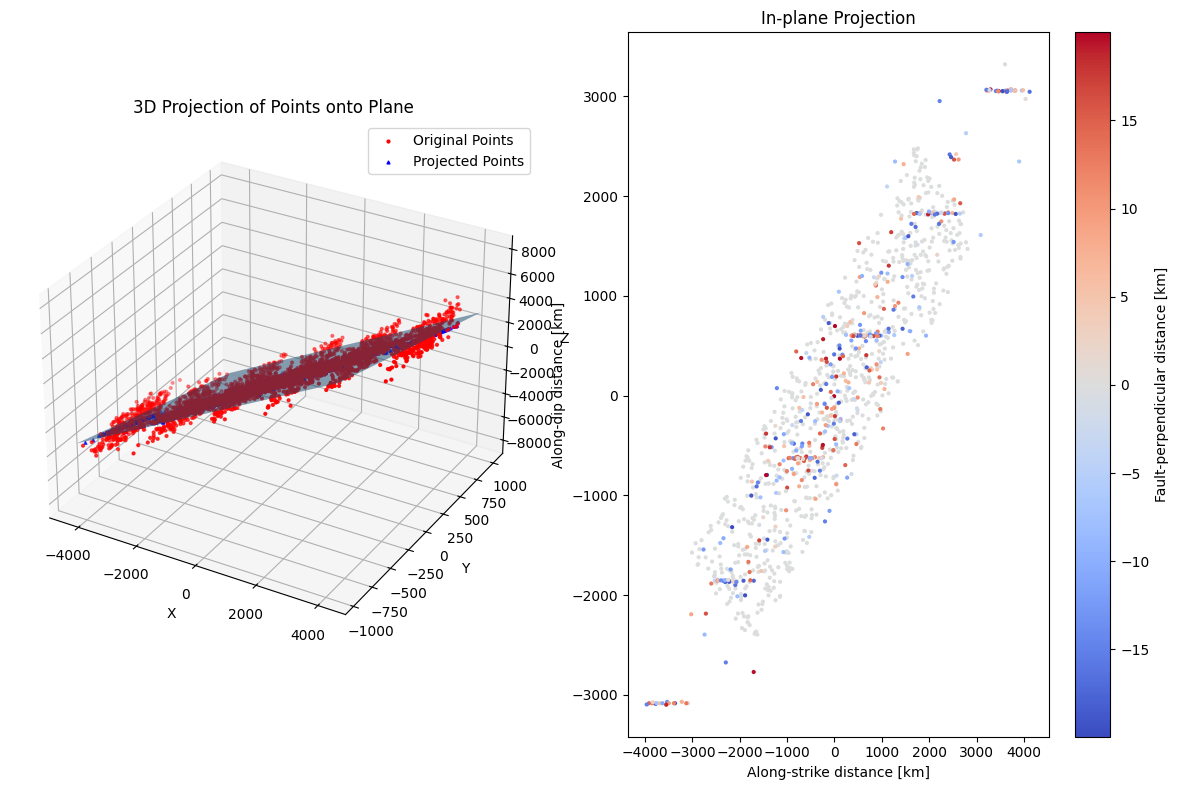

In [334]:
# Vertical profile
 
profiles = {
    'normal_vector': normal_vector(28,70),
    'strike': 28,
    'dip': 70,
    'x0' : np.array([0,0,0]),
    'y0' : np.array([0,0,0]),
    'z0' : np.array([0,0,0])
}

points = X_orth

iprofile =0
plotme = True

rmax=20

_, r_main, rS_main, rD_main = project_pointcloud_onto_plane(points, center, profiles, iprofile, rmax, plotme)

### Slicer function : creates plane with defined center and orientation, finds datapoints that are close enough to the plane, projects the points onto the plane, saves the indices of the projected points, transforms the projected data to 2D and plots.

In [201]:
def plane_points(X, normal, center, tolerance=10):
    """
    Find the points in X that lie in the plane defined by normal vector and center point 
    """
    points = []

    for i in range(len(X)):
        vec = X[i] - center

        #if np.round(np.dot(vec, normal), decimals = 0) == 0:
        if np.abs(np.dot(vec, normal)) <= tolerance:
            points.append(X[i])

    return points

In [202]:
def project_points_onto_plane(points, normal, point_on_plane):
    normal = normal / np.linalg.norm(normal)
    projected_points = points - np.outer(np.dot(points - point_on_plane[0], normal), normal)
    return projected_points

In [203]:
def find_plane_basis(plane_normal):
    plane_normal = plane_normal / np.linalg.norm(plane_normal)
    # Find a vector that is not parallel to the plane normal
    if (plane_normal[0] != 0 or plane_normal[1] != 0):
        u = np.cross(plane_normal, [0, 0, 1])
    else:
        u = np.cross(plane_normal, [0, 1, 0])
    u = u / np.linalg.norm(u)
    v = np.cross(plane_normal, u)
    return u, v

In [17]:
# Find the subset indices of the projected points in X_orth
def find_subset_indices(projected_points, X_orth):
    subset_indices = []
    for point in projected_points:
        index = np.where((X_orth == point).all(axis=1))[0][0]
        subset_indices.append(index)
    return subset_indices

In [207]:

slice_indices = find_subset_indices(slice, X_orth)

# Extract the cluster labels for the projected points using the subset indices
slice_cluster_labels = np.array(clusters_orth)[slice_indices]

TypeError: 'type' object is not iterable

In [205]:
from matplotlib.colors import ListedColormap

In [206]:
def find_subset_indices(subset, fullset):
    """
    Find the indices of the subset points within the fullset.
    """
    fullset_list = [tuple(point) for point in fullset]
    return [fullset_list.index(tuple(point)) for point in subset]


In [208]:
def slicer(X, normal, center, clusters, tolerance):
    projected_slice=[]
    slice_cluster_labels=[]

    slice = plane_points(X, normal, center, tolerance)
    if len(slice)==0:
        print("Empty slice")
    else:
        projected_slice = project_points_onto_plane(slice, normal, center)
        u,v = find_plane_basis(normal)
        uv_coords = [(np.dot(point, u), np.dot(point, v)) for point in projected_slice]
        slice_indices = find_subset_indices(slice, X)
        slice_cluster_labels = np.array(clusters)[slice_indices]
        x_coords, y_coords = zip(*uv_coords)

     # Define a colormap for discrete cluster labels
        cmap = ListedColormap(plt.get_cmap('tab10', len(set(clusters))).colors)

    # Plot the 2D projection with discrete colors
        plt.scatter(x_coords, y_coords, c=slice_cluster_labels, cmap=cmap, marker='o', s=2,vmin=0, vmax=max(clusters))
        plt.title('2D Projection of 3D Points onto Plane')
        plt.xlabel('U-axis')
        plt.ylabel('V-axis')
        plt.colorbar(ticks=range(len(set(clusters))), label='Cluster Index')
        plt.grid(True)
        plt.axis('equal')  # Ensure equal scaling
        plt.show()

    return projected_slice, slice_cluster_labels, x_coords, y_coords, slice_indices


### Example of slicer function

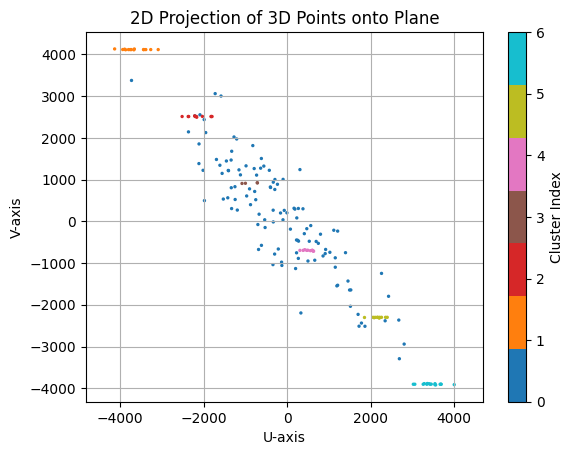

In [245]:
normal_vect = normal_vector(28,70)
projected_slice, slice_cluster_labels,x_coords, y_coords, slice_indices = slicer(X_orth, normal_vect, np.array([-3863.04773056,  -458.94072125, -3865.70658765]), clusters_orth, tolerance=10)

### Get the projection of points that are close enough to planes that rotate from centroid of X with fixed strike of 28 (macro orientation) and varyin dip of 67-73 degrees.

Strike 28 and dip 67:


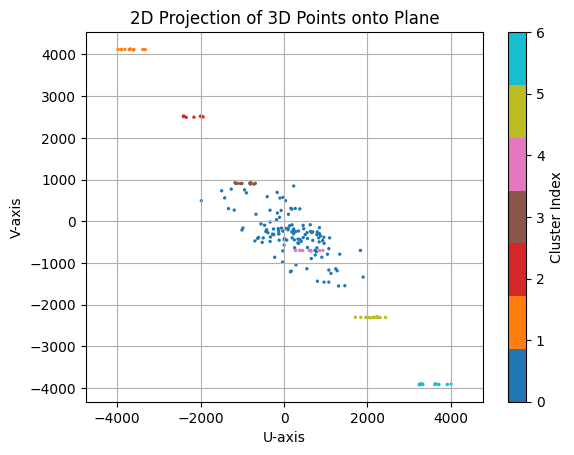

<Figure size 640x480 with 0 Axes>

Strike 28 and dip 68:


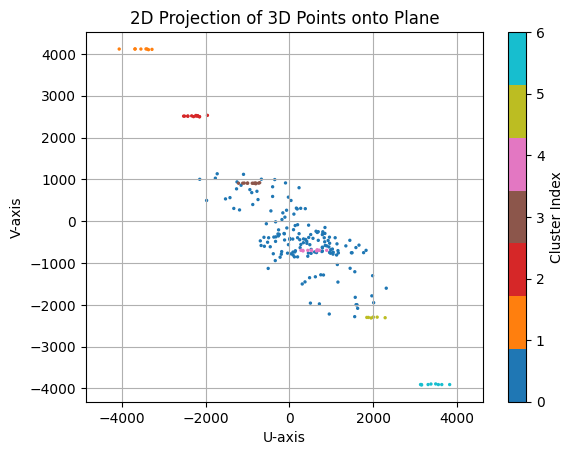

<Figure size 640x480 with 0 Axes>

Strike 28 and dip 69:


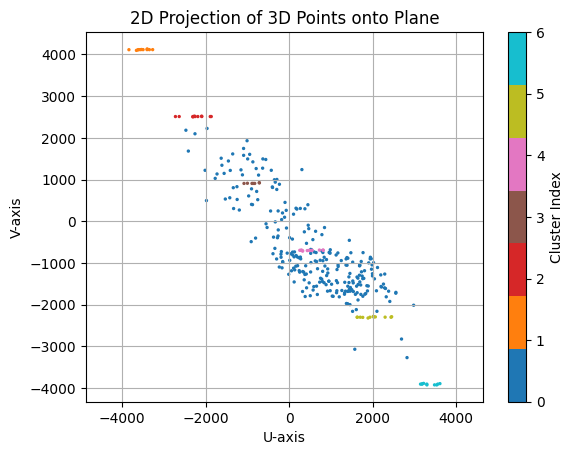

<Figure size 640x480 with 0 Axes>

Strike 28 and dip 70:


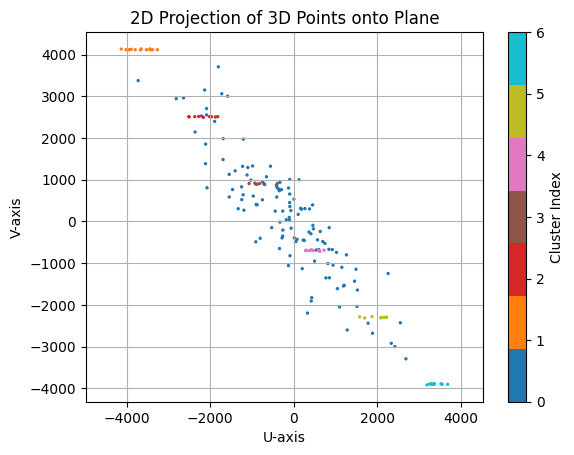

<Figure size 640x480 with 0 Axes>

Strike 28 and dip 71:


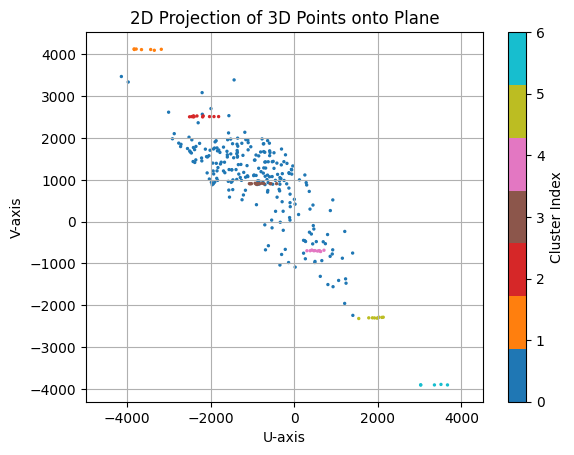

<Figure size 640x480 with 0 Axes>

In [210]:
centroid = np.mean(X_orth, axis=0) # center of entire dataset

projection_list=[]
slice_cluster_list = []
projection_2D_list = []
indices_list = []

for strike in range(28,29):

    for dip in range(67,72):

        normal_vect = normal_vector(strike,dip)
        print(f"Strike {strike} and dip {dip}:")

        #for center in enumerate(centers):
        projected_slice, slice_cluster_labels, x_coords, y_coords, slice_indices = slicer(X_orth, normal_vect, centroid, clusters_orth, tolerance=10)
        projected_slice_2D = np.vstack((x_coords, y_coords)).T
        projection_list.append(projected_slice)
        slice_cluster_list.append(slice_cluster_labels)
        projection_2D_list.append(projected_slice_2D)
        indices_list.append(slice_indices)

        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()

### Stack all the 2D projections on top of eachother and select on the points which are close enough to eachother. 

In [211]:
# Function to find common points within threshold distance
def find_close_points(datasets, threshold):
    common_points = []
    for point in datasets[0]:
        is_common = True
        for dataset in datasets[1:]:
            distances = cdist([point], dataset)
            min_distance = np.min(distances)
            if min_distance > threshold:
                is_common = False
                break
        if is_common:
            common_points.append(point)
    return np.array(common_points)

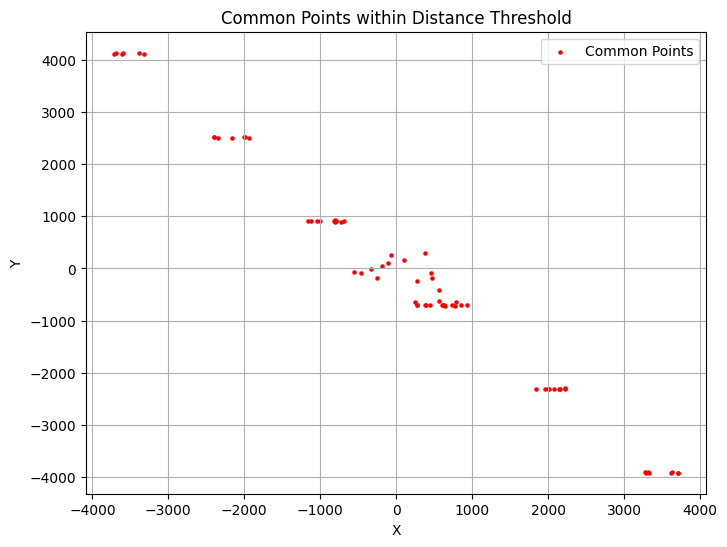

In [212]:
from scipy.spatial.distance import cdist

# Define distance threshold
threshold = 100.0  # Adjust as needed


# Find common points within threshold distance
common_points_array = find_close_points(projection_2D_list, threshold)

# Plot the common points
plt.figure(figsize=(8, 6))
plt.scatter(common_points_array[:, 0], common_points_array[:, 1], color='red', label='Common Points', s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Common Points within Distance Threshold')
plt.legend()
plt.grid(True)

plt.show()

### Perform dbscan clustering on the common points.

In [22]:
from sklearn.cluster import DBSCAN

In [213]:
def apply_dbscan_and_plot(common_points_array, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(common_points_array)
    labels = db.labels_

    # Plot the results
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(10, 6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black used for noise.

        class_member_mask = (labels == k)
        xy = common_points_array[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=2)

    plt.title(f'DBSCAN clustering results (eps={eps}, min_samples={min_samples})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return labels

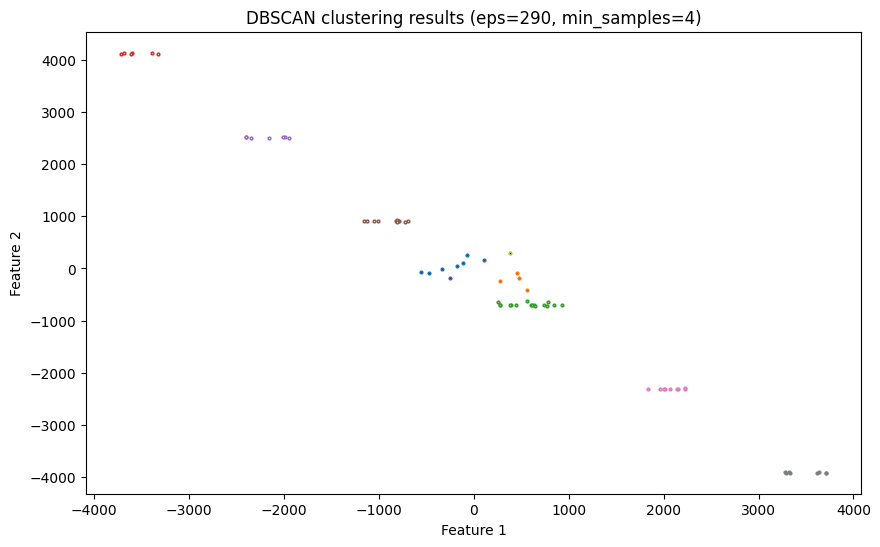

In [215]:
 db_labels = apply_dbscan_and_plot(common_points_array, eps=290, min_samples=4)

### Stack all the projections to form one dataset. Plot the dbscan clusters and noise points (all others).

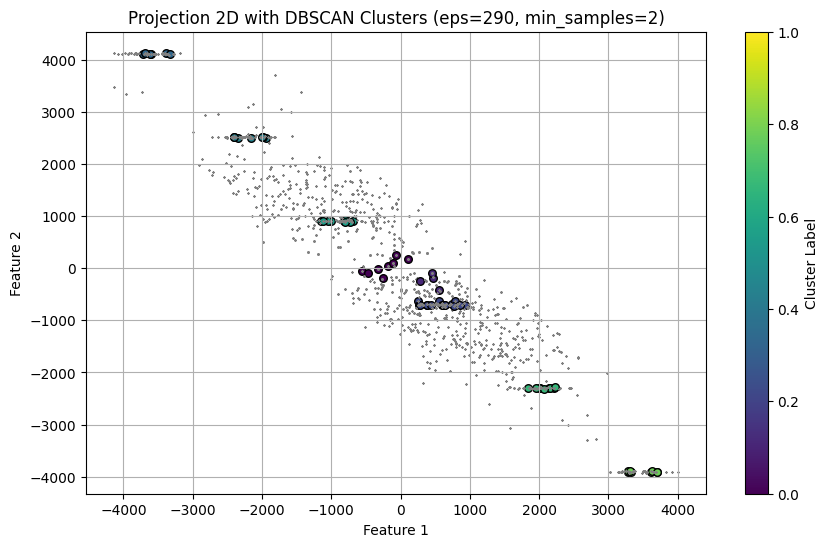

In [216]:
# Plot the original projection_2D_list with points colored according to DBSCAN clusters
plt.figure(figsize=(10, 6))
color_map = plt.get_cmap('viridis', len(set(db_labels)) + 1)  # Colormap for clusters + noise

for idx, dataset in enumerate(projection_2D_list):
    for point in dataset:
        # Find which cluster this point belongs to
        if any(np.all(point == cp) for cp, label in zip(common_points_array, db_labels) if label != -1):
            cluster_label = db_labels[np.all(common_points_array == point, axis=1)][0]
            plt.scatter(point[0], point[1], color=color_map(cluster_label), marker='o', edgecolors='k', s=30)
        else:
            plt.scatter(point[0], point[1], color='gray', marker='x', s=1)  # Noise points

plt.title(f'Projection 2D with DBSCAN Clusters (eps={290}, min_samples={2})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### Stack all the 2D projections on top of eachother (i.e. consider all points in projection_2D_list as one dataset). Then, extend each cluster (given by db_lables) along its principal line (obtain extended_labels, which gives the extended cluster labels of all points of the stacked dataset).

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import pairwise_distances_argmin_min

In [217]:
# Combine all datasets into a single array for extension
all_points = np.vstack(projection_2D_list)

In [218]:


# Function to extend clusters with principal line
def extend_clusters_with_principal_line(all_points, common_points_array, labels, threshold):
    extended_labels = np.full(all_points.shape[0], -1, dtype=int)
    labels = np.array(labels)  # Ensure labels is a NumPy array
    unique_labels = set(labels)
    unique_labels.discard(-1)  # Remove noise label

    for cluster_label in unique_labels:
        # Extract the cluster points
        cluster_points = common_points_array[labels == cluster_label]


        # Fit a principal line using linear regression
        lr = LinearRegression()
        lr.fit(cluster_points[:, 0].reshape(-1, 1), cluster_points[:, 1])

        # Predict points on the line
        line_x = np.linspace(cluster_points[:, 0].min(), cluster_points[:, 0].max(), 1000)
        line_y = lr.predict(line_x.reshape(-1, 1))
        line_points = np.vstack((line_x, line_y)).T

        # Find points close to the principal line
        _, distances = pairwise_distances_argmin_min(all_points, line_points)
        close_points_indices = np.where(distances <= threshold)[0]
        
        # Assign close points to the current cluster
        extended_labels[close_points_indices] = cluster_label

    return extended_labels

In [313]:
# Extend clusters
extension_threshold = 100.0  # Adjust the extension threshold as needed
extended_labels = extend_clusters_with_principal_line(all_points, common_points_array, db_labels, extension_threshold)

# Dictionary to store clusters
clusters = {i: [] for i in set(extended_labels) if i != -1}
noise_points = []

# Populate clusters and noise points
for point, label in zip(all_points, extended_labels):
    if label == -1:
        noise_points.append(point)
    else:
        clusters[label].append(point)


/var/folders/86/_wvdc34d04bd9rzzz16ln4r00000gn/T/ipykernel_16675/1667554815.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(all_points[mask][:, 0], all_points[mask][:, 1], color=color, marker=marker, edgecolors='k', s=marker_size)


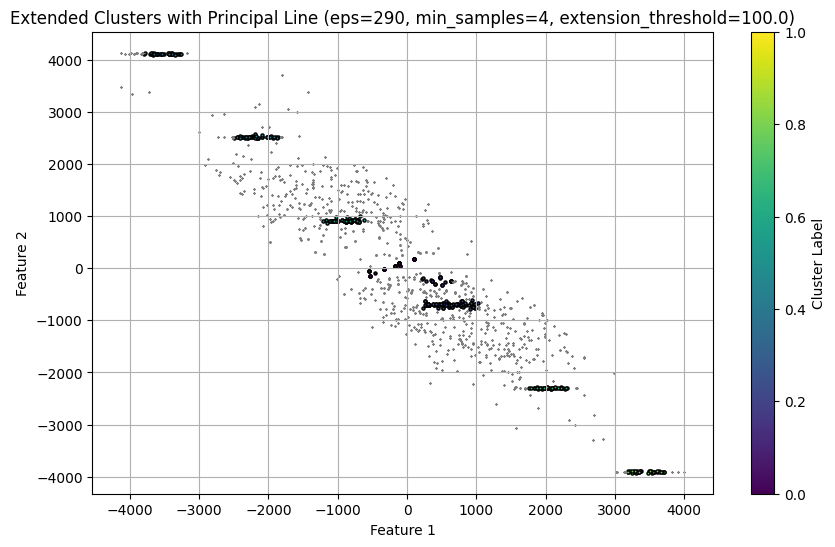

In [314]:
# Plot the original projection_2D_list with points colored according to DBSCAN clusters
plt.figure(figsize=(10, 6))
color_map = plt.get_cmap('viridis', len(set(extended_labels)) + 1)  # Colormap for clusters + noise

for label in set(extended_labels):
    if label == -1:
        color = 'gray'
        marker = 'x'
        marker_size = 1
    else:
        color = color_map(label / len(set(extended_labels)))
        marker = 'o'
        marker_size =5
    
    mask = (extended_labels == label)
    plt.scatter(all_points[mask][:, 0], all_points[mask][:, 1], color=color, marker=marker, edgecolors='k', s=marker_size)

plt.title(f'Extended Clusters with Principal Line (eps={290}, min_samples={4}, extension_threshold={extension_threshold})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### Assign a cluster label to each point in each slice or projection_2D_list (obtain extended_labels_2D). Basically, "unstack" the labels found in extended_labels.

In [315]:
extended_labels_2D = []

for idx, dataset in enumerate(projection_2D_list):

    extended_labels_projection = []

    for point in dataset:
        # Find which cluster this point belongs to
        cluster_label = extended_labels[np.all(all_points == point, axis=1)][0]
        extended_labels_projection.append(cluster_label)

    extended_labels_2D.append(extended_labels_projection)


### Assign cluster or noise labels to all points in X, and plot (with or without noise)

In [223]:
def assign_labels_to_points(X, indices_list, labels_list):
    """
    Assigns cluster labels to points in X based on given indices and corresponding labels.

    Parameters:
    X (np.ndarray): The array of points.
    indices_list (list of lists): A list of lists, where each sublist contains the indices of points in X.
    labels_list (list of lists): A list of lists, where each sublist contains the cluster labels for the corresponding indices.

    Returns:
    np.ndarray: An array with cluster labels for each point in X.
    """
    # Initialize an array to store cluster labels for points in X
    num_points = X.shape[0]
    cluster_labels = -1 * np.ones(num_points, dtype=int)  # Initialize with -1 indicating no cluster assignment

    # Iterate over each set of indices and corresponding labels
    for indices, labels in zip(indices_list, labels_list):
        for idx, label in zip(indices, labels):
            cluster_labels[idx] = label

    return cluster_labels

In [323]:
len(X_orth)

3360

In [316]:
cluster_labels_3D = assign_labels_to_points(X_orth, indices_list, extended_labels_2D)

In [225]:
def plot_clusters_3D(X_orth, cluster_labels_3D,plot_noise):
    # Create a colormap
    unique_labels = np.unique(cluster_labels_3D)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    cmap = ListedColormap(plt.get_cmap('tab10', n_clusters).colors)
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each cluster with a different color
    for label in unique_labels:
        if label == -1 and not plot_noise:
            continue  # Skip plotting noise points if plot_noise is False

        if label == -1:
            # Plot noise points in gray
            color = 'gray'
            marker_size = 1
        else:
            # Get the color for the cluster
            color = cmap(label % n_clusters)
            marker_size = 8
        
        # Get the points that belong to this cluster
        points = X_orth[cluster_labels_3D == label]
        
        # Plot the points
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, label=f'Cluster {label}' if label != -1 else 'Noise', s=marker_size)
    
    # Add legend
    ax.legend()
    
    # Set plot labels
    ax.set_title('3D Clusters')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    
    # Show plot
    plt.show()

/var/folders/86/_wvdc34d04bd9rzzz16ln4r00000gn/T/ipykernel_16675/3807927550.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, label=f'Cluster {label}' if label != -1 else 'Noise', s=marker_size)


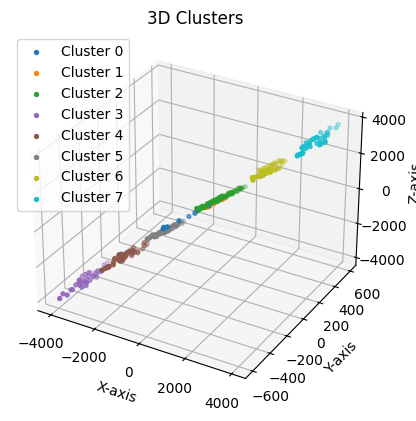

In [317]:
plot_clusters_3D(X_orth, cluster_labels_3D, plot_noise=False)

### Apply gaussian kernel smoothing to clusters

In [336]:
# Identify indices of noise (-1) and non-noise clusters
noise_indices = np.where(cluster_labels_3D == -1)[0]
non_noise_indices = np.where(cluster_labels_3D != -1)[0]
# Extract non-noise points
non_noise_points = X_orth[non_noise_indices]
non_noise_labels = cluster_labels_3D[non_noise_indices]

In [337]:
from scipy.spatial import cKDTree

def gaussian_kernel(distance, sigma):
    return np.exp(-0.5 * (distance / sigma) ** 2)

def apply_gaussian_smoothing(points, sigma):
    smoothed_points = np.zeros_like(points)
    tree = cKDTree(points)
    
    for i, point in enumerate(points):
        # Query the tree to find neighbors
        distances, indices = tree.query(point, k=15)  # k is the number of neighbors
        
        # Apply Gaussian Kernel
        weights = gaussian_kernel(distances, sigma)
        
        # Compute weighted average of neighbors
        weighted_sum = np.sum(weights[:, np.newaxis] * points[indices], axis=0)
        smoothed_points[i] = weighted_sum / np.sum(weights)
    
    return smoothed_points

In [347]:
sigma = 100.0  # Standard deviation of the Gaussian kernel

# Apply Gaussian smoothing to non-noise points
smoothed_non_noise_points = apply_gaussian_smoothing(non_noise_points, sigma)

# Combine smoothed non-noise points back with noise points
smoothed_points = np.copy(X_orth)
smoothed_points[non_noise_indices] = smoothed_non_noise_points

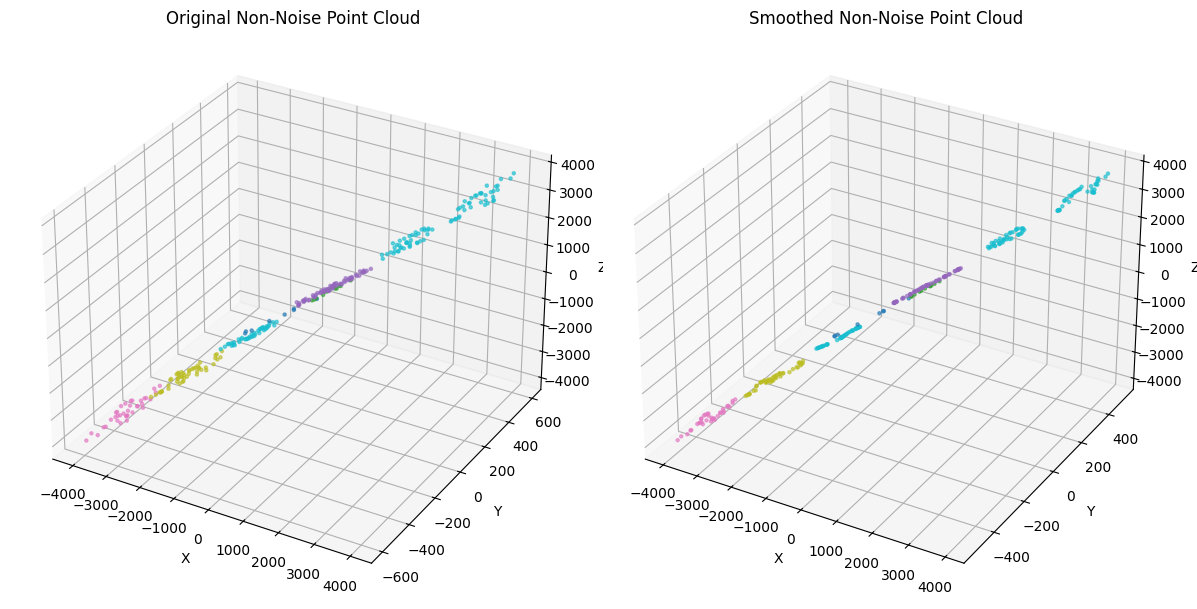

In [348]:
# Define a colormap for cluster labels
colormap = plt.get_cmap('tab10')  # Use a colormap with enough distinct colors

# Create color map for clusters
colors = np.array([colormap(label / 5.0) for label in non_noise_labels])  # Normalize labels for colormap

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot original non-noise point cloud
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(non_noise_points[:, 0], non_noise_points[:, 1], non_noise_points[:, 2], c=colors, s=5, alpha=0.6)
ax1.set_title('Original Non-Noise Point Cloud')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot smoothed non-noise point cloud
smoothed_colors = np.array([colormap(label / 5.0) for label in non_noise_labels])  # Same colors for clusters
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(smoothed_non_noise_points[:, 0], smoothed_non_noise_points[:, 1], smoothed_non_noise_points[:, 2], c=smoothed_colors, s=5, alpha=0.6)
ax2.set_title('Smoothed Non-Noise Point Cloud')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

### ARI : compare ground truth vs obtained clustering

In [237]:
from sklearn.metrics import adjusted_rand_score

def compute_adjusted_rand_index(ground_truth_labels, predicted_labels):
    """
    Compute the Adjusted Rand Index (ARI) between ground truth labels and predicted labels.

    Parameters:
    ground_truth_labels (np.ndarray): Ground truth cluster labels.
    predicted_labels (np.ndarray): Cluster labels from clustering algorithm.

    Returns:
    ari_score (float): The Adjusted Rand Index score.
    """
    ari_score = adjusted_rand_score(ground_truth_labels, predicted_labels)
    return ari_score

In [326]:
# Count the number of points in each cluster : ground truth
unique_clusters, counts = np.unique(clusters_orth, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster}: {count} points')

Cluster 0: 1440 points
Cluster 1: 320 points
Cluster 2: 320 points
Cluster 3: 320 points
Cluster 4: 320 points
Cluster 5: 320 points
Cluster 6: 320 points


In [329]:
# Count the number of points in each cluster : obtained
unique_clusters, counts = np.unique(cluster_labels_3D, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster}: {count} points')

Cluster -1: 3069 points
Cluster 0: 8 points
Cluster 1: 11 points
Cluster 2: 67 points
Cluster 3: 36 points
Cluster 4: 49 points
Cluster 5: 43 points
Cluster 6: 40 points
Cluster 7: 37 points


In [318]:
# 2D clusters extended along principal line then returned to 3D
ari_score = compute_adjusted_rand_index(clusters_orth, cluster_labels_3D)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.0395


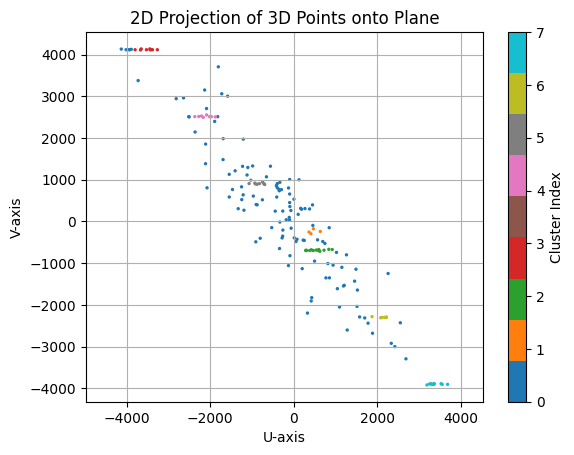

In [319]:
projected_slice_obtained, slice_cluster_labels_obtained, _, _, _ = slicer(X_orth, normal_vect, centroid, cluster_labels_3D, tolerance=10)

In [330]:
# 2D clusters extended along principal line, remain in 2D : ground truth
# Count the number of points in each cluster
unique_clusters, counts = np.unique(slice_cluster_list[3], return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster}: {count} points')

Cluster 0: 123 points
Cluster 1: 14 points
Cluster 2: 9 points
Cluster 3: 7 points
Cluster 4: 9 points
Cluster 5: 8 points
Cluster 6: 10 points


In [331]:
# 2D clusters extended along principal line, remain in 2D : obtained
# Count the number of points in each cluster
unique_clusters, counts = np.unique(slice_cluster_labels_obtained, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster}: {count} points')

Cluster -1: 115 points
Cluster 0: 6 points
Cluster 1: 4 points
Cluster 2: 13 points
Cluster 3: 9 points
Cluster 4: 8 points
Cluster 5: 9 points
Cluster 6: 6 points
Cluster 7: 10 points


In [325]:
# 2D clusters extended along principal line, remain in 2D
ari_score_2D = compute_adjusted_rand_index(slice_cluster_list[3], slice_cluster_labels_obtained)
print(f"Adjusted Rand Index (ARI): {ari_score_2D:.4f}")

Adjusted Rand Index (ARI): 0.5695


### This part tries to extend the obtained clusters in 3D by fitting a plane to each cluster and adding points that are close to the plane (not good because small number of points in each cluster may lead to a wrong PC plane and wrong points added to the extended cluster)

In [233]:
from sklearn.decomposition import PCA

In [234]:
def find_principal_plane(X, cluster_labels, threshold=0.1):
    """
    Finds the principal plane of each cluster and assigns labels to each point indicating cluster membership or noise.
    Ensures that each extended cluster contains at least as many points as the original cluster.

    Parameters:
    X (np.ndarray): The array of points.
    cluster_labels (np.ndarray): An array with cluster labels for each point.
    threshold (float): Threshold distance to the principal plane.

    Returns:
    list: A list of labels (ints) for each point indicating cluster membership or noise (-1).
    """
    num_points = X.shape[0]
    labels = [-1] * num_points  # Initialize with -1 (noise label) for all points

    # Find unique cluster labels (excluding noise label -1)
    unique_labels = np.unique(cluster_labels)
    unique_labels = unique_labels[unique_labels != -1]

    for label in unique_labels:
        # Select points belonging to the current cluster
        cluster_points = X[cluster_labels == label]

        if len(cluster_points) == 0:
            continue
        
        # Perform PCA to find principal components of the cluster
        pca = PCA(n_components=2)
        pca.fit(cluster_points)
        u, v = pca.components_

        # Find center of the cluster
        center = np.mean(cluster_points, axis=0)

        # Extend the cluster by adding points within threshold distance from the plane
        for idx, point in enumerate(X):
            if labels[idx] == -1:  # Only consider points not yet assigned to a cluster
                if np.abs(np.dot(point - center, np.cross(u, v))) / np.linalg.norm(np.cross(u, v)) <= threshold:
                    labels[idx] = label

    return labels


In [235]:
extended_cluster_labels_3D = find_principal_plane(X_orth, cluster_labels_3D, threshold=10)

/var/folders/86/_wvdc34d04bd9rzzz16ln4r00000gn/T/ipykernel_16675/3807927550.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, label=f'Cluster {label}' if label != -1 else 'Noise', s=marker_size)


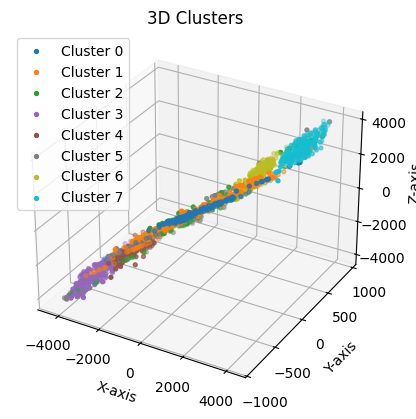

In [236]:
# Plot the points with extended cluster labels
plot_clusters_3D(X_orth, extended_cluster_labels_3D, plot_noise=False)

In [332]:
# Clusters extended in 2D and 3D : ground truth
# Count the number of points in each cluster
unique_clusters, counts = np.unique(clusters_orth, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster}: {count} points')

Cluster 0: 1440 points
Cluster 1: 320 points
Cluster 2: 320 points
Cluster 3: 320 points
Cluster 4: 320 points
Cluster 5: 320 points
Cluster 6: 320 points


In [333]:
# Clusters extended in 2D and 3D : obtained
# Count the number of points in each cluster
unique_clusters, counts = np.unique(extended_cluster_labels_3D, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f'Cluster {cluster}: {count} points')

Cluster -1: 2071 points
Cluster 0: 132 points
Cluster 1: 230 points
Cluster 2: 105 points
Cluster 3: 223 points
Cluster 4: 149 points
Cluster 5: 70 points
Cluster 6: 164 points
Cluster 7: 216 points


In [239]:
ari_score = compute_adjusted_rand_index(clusters_orth, extended_cluster_labels_3D)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.1886


# Test slicer on real data

In [7]:
import pandas as pd

In [8]:
# Import Bedretto M0 experiment provisional dataset 
catalog = pd.read_csv('seiscomp-exp-dd_20240415.csv')
catalog_xyz = catalog[['x', 'y', 'z']]
X = catalog_xyz.to_numpy()

In [9]:

def apply_dbscan_and_plot_3D(data, eps=0.5, min_samples=5):
    """
    Apply DBSCAN to 3D data and plot the clusters.
    
    Parameters:
    data (numpy.ndarray): The input data array with shape (n_samples, 3).
    eps (float): The maximum distance between two samples for them to be considered as in the same neighborhood.
    min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.
    
    Returns:
    numpy.ndarray: Array of cluster labels.
    """
    
    # Apply DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(data)
    
    # Plot the clusters in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Get unique labels
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = (labels == k)
        
        xyz = data[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=[col], label=f'Cluster {k}' if k != -1 else 'Noise', s=2)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()
    
    return labels

In [10]:
from sklearn.metrics import silhouette_score

In [30]:
def grid_search_dbscan(data, eps_values, min_samples_values):
    best_score = -1
    best_params = None
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data)
            
            # Ignore the silhouette score for noise-only clusters
            if len(set(labels)) > 1:
                score = silhouette_score(data, labels)
                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_labels = labels

    print(f"Best silhouette score: {best_score} with eps={best_params[0]} and min_samples={best_params[1]}")
    return best_params, best_labels

In [354]:
# Define parameter ranges for grid search
eps_values = np.linspace(10, 1, 100)
min_samples_values = range(1, 10)

# Perform grid search
best_params, best_labels = grid_search_dbscan(X, eps_values, min_samples_values)

Best silhouette score: 0.6096273649470855 with eps=6.454545454545455 and min_samples=8


In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

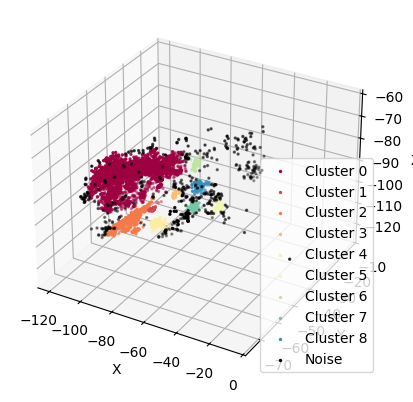

In [35]:
X_db_labels = apply_dbscan_and_plot_3D(X, eps=2.5, min_samples=25)

In [36]:
# Determine the largest cluster
def largest_cluster(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    largest_cluster_label = unique_labels[np.argmax(counts)]
    largest_cluster_size = counts[np.argmax(counts)]
    
    print(f"Largest cluster label: {largest_cluster_label}")
    print(f"Largest cluster size: {largest_cluster_size}")
    
    return largest_cluster_label, largest_cluster_size

largest_cluster_label, largest_cluster_size = largest_cluster(X_db_labels)

Largest cluster label: 0
Largest cluster size: 6164


### Let's consider only the largest cluster

In [37]:
X_main = X[X_db_labels == 0]

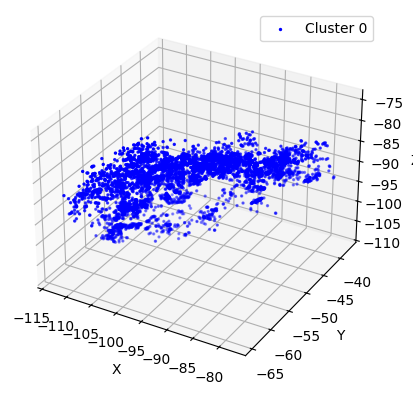

In [38]:
# Plot cluster 0 points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_main[:, 0], X_main[:, 1], X_main[:, 2], c='blue', label='Cluster 0', s=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

In [87]:
strike_main, dip_main = find_principal_plane_strike_and_dip(X_main)
print(f"strike : {strike_main}, dip : {dip_main}")

strike : 36.46775656147116, dip : 108.63569769725682


### Again apply DBSCAN

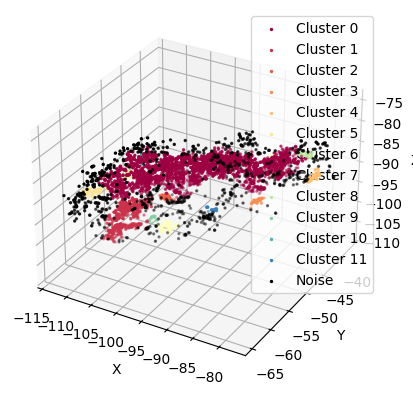

In [68]:
# Perform DBSCAN again
X_db_labels_main = apply_dbscan_and_plot_3D(X_main, eps=1.2, min_samples=20)

In [69]:
X_main_2 = X_main[X_db_labels_main == 0]

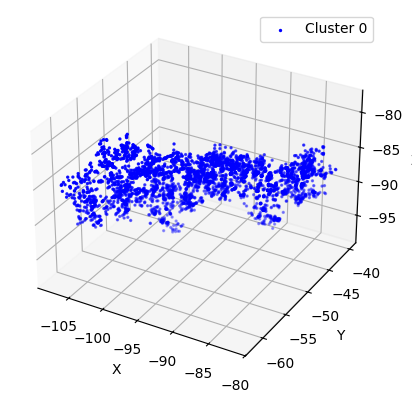

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_main_2[:, 0], X_main_2[:, 1], X_main_2[:, 2], c='blue', label='Cluster 0', s=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

In [76]:
def find_principal_plane_strike_and_dip(point_cloud):
    """
    Find the strike and dip of the principal plane of a 3D point cloud.
    
    Parameters:
    point_cloud (numpy.ndarray): An N x 3 array representing the 3D point cloud.
    
    Returns:
    tuple: A tuple containing the strike (in degrees) and dip (in degrees) of the principal plane.
    """
    def vector_to_strike_and_dip(normal_vector):
        # Normalize the normal vector
        normal_vector = normal_vector / np.linalg.norm(normal_vector)
        
        # Calculate the dip angle (angle from the horizontal)
        dip = np.degrees(np.arccos(normal_vector[2]))
        
        # Calculate the dip direction (azimuth of the normal vector projection onto the horizontal plane)
        dip_direction = np.degrees(np.arctan2(normal_vector[1], normal_vector[0]))
        if dip_direction < 0:
            dip_direction += 360
        
        # Calculate the strike as the dip direction + 90 degrees (perpendicular)
        strike = (dip_direction + 90) % 360
        
        return strike, dip

    # Step 1: Center the data
    mean_point = np.mean(point_cloud, axis=0)
    centered_data = point_cloud - mean_point

    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4: Identify the principal components
    sorted_indices = np.argsort(eigenvalues)[::-1]
    principal_component_1 = eigenvectors[:, sorted_indices[0]]
    principal_component_2 = eigenvectors[:, sorted_indices[1]]

    # Step 5: Compute the normal vector to the principal plane
    normal_vector = np.cross(principal_component_1, principal_component_2)
    
    # Step 6: Convert the normal vector to strike and dip
    strike, dip = vector_to_strike_and_dip(normal_vector)
    
    return strike, dip

In [77]:
strike_main_2, dip_main_2 = find_principal_plane_strike_and_dip(X_main_2)
print(f"strike : {strike_main_2}, dip : {dip_main_2}")

strike : 215.67259795180001, dip : 66.4817105194424


In [44]:
def slicer_real(X, normal, center, tolerance):
    projected_slice=[]

    slice = plane_points(X, normal, center, tolerance)
    if len(slice)==0:
        print("Empty slice")
    else:
        projected_slice = project_points_onto_plane(slice, normal, center)
        u,v = find_plane_basis(normal)
        uv_coords = [(np.dot(point, u), np.dot(point, v)) for point in projected_slice]
        slice_indices = find_subset_indices(slice, X)
        x_coords, y_coords = zip(*uv_coords)

    # Plot the 2D projection with discrete colors
        plt.scatter(x_coords, y_coords, marker='o', s=2)
        plt.title('2D Projection of 3D Points onto Plane')
        plt.xlabel('U-axis')
        plt.ylabel('V-axis')
        plt.grid(True)
        plt.axis('equal')  # Ensure equal scaling
        plt.show()

    return projected_slice, x_coords, y_coords, slice_indices

In [4]:
import numpy as np

Strike 215 and dip 60:


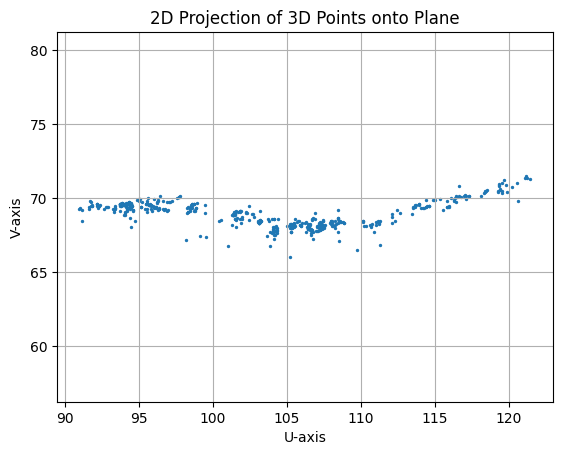

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 62:


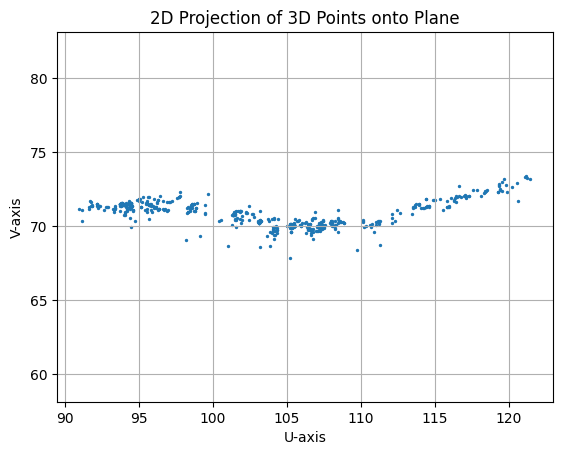

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 64:


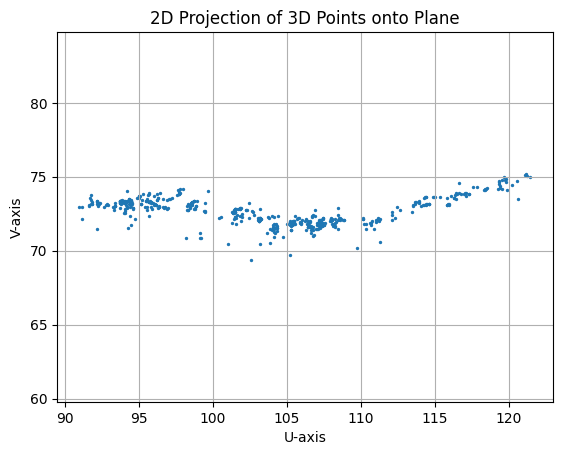

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 66:


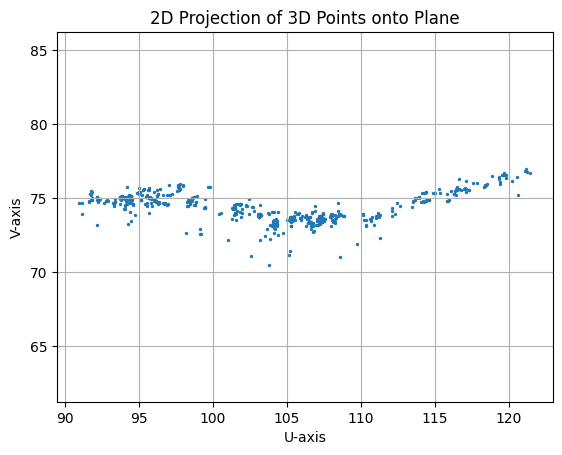

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 68:


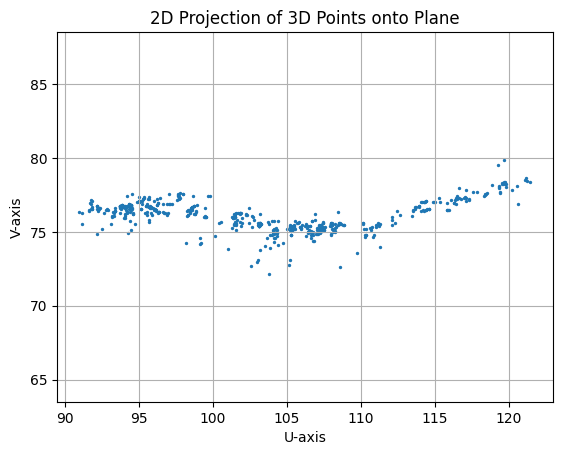

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 70:


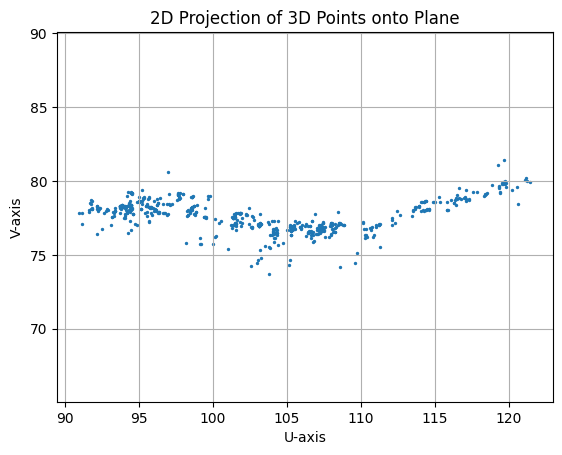

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 72:


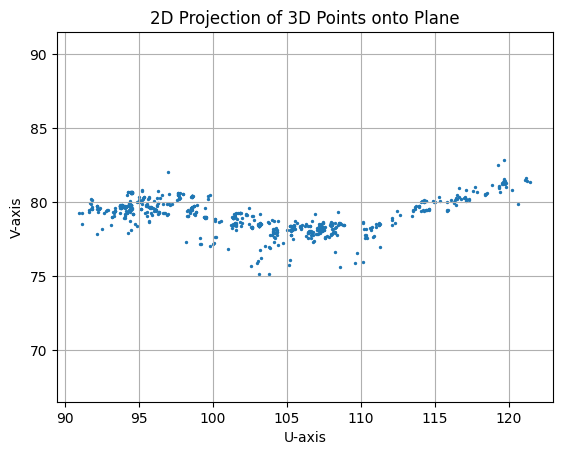

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 74:


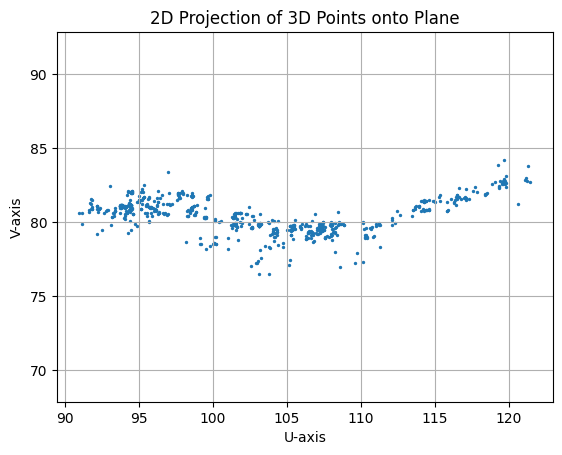

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 76:


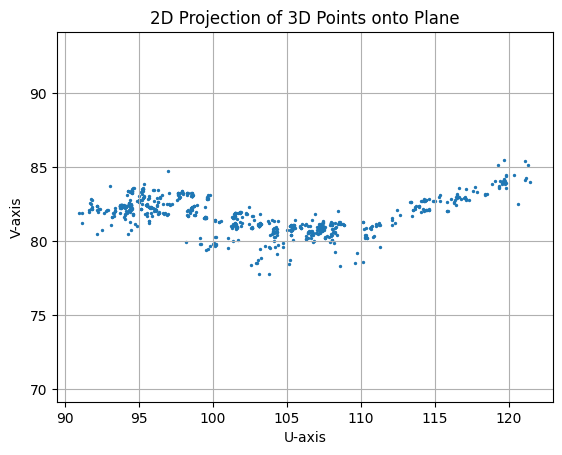

<Figure size 640x480 with 0 Axes>

Strike 215 and dip 78:


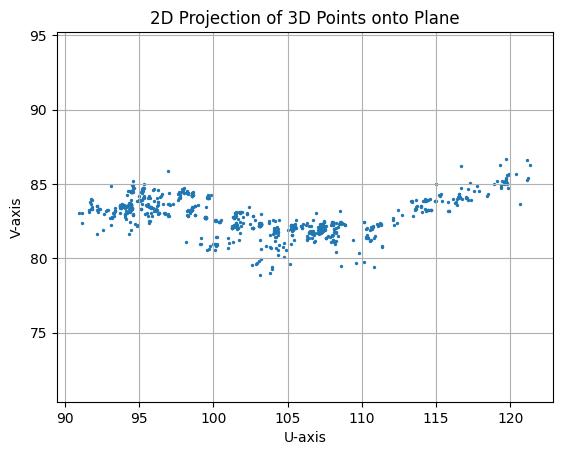

<Figure size 640x480 with 0 Axes>

In [96]:
centroid_m = np.mean(X_main_2, axis=0) # center of entire dataset

projection_list_m=[]
projection_2D_list_m = []
indices_list_m = []

for strike in range(215,216):

    for dip in range(60,80, 2):

        normal_vect = normal_vector(strike,dip)
        print(f"Strike {strike} and dip {dip}:")

        #for center in enumerate(centers):
        projected_slice_m, x_coords_m, y_coords_m, slice_indices_m = slicer_real(X_main_2, normal_vect, centroid_m, tolerance=0.5)
        projected_slice_2D_m = np.vstack((x_coords_m, y_coords_m)).T
        projection_list_m.append(projected_slice_m)
        projection_2D_list_m.append(projected_slice_2D_m)
        indices_list_m.append(slice_indices_m)

        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()

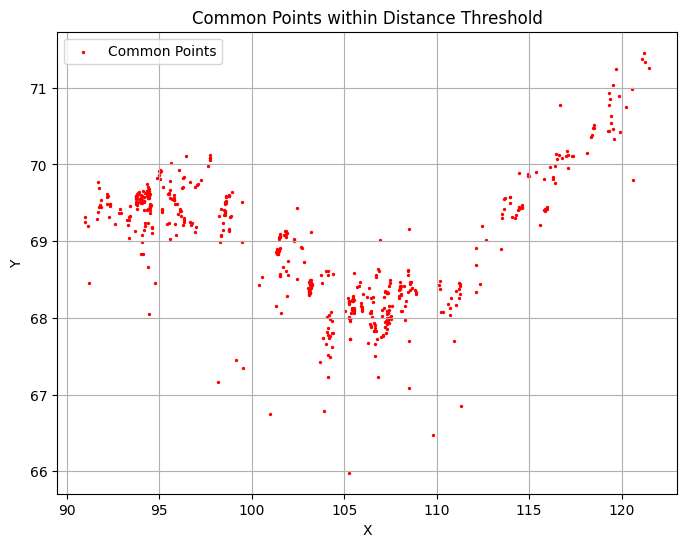

In [103]:
from scipy.spatial.distance import cdist

# Define distance threshold
threshold = 20 # Adjust as needed


# Find common points within threshold distance
common_points_array_m = find_close_points(projection_2D_list_m, threshold)

# Plot the common points
plt.figure(figsize=(8, 6))
plt.scatter(common_points_array_m[:, 0], common_points_array_m[:, 1], color='red', label='Common Points', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Common Points within Distance Threshold')
plt.legend()
plt.grid(True)

plt.show()

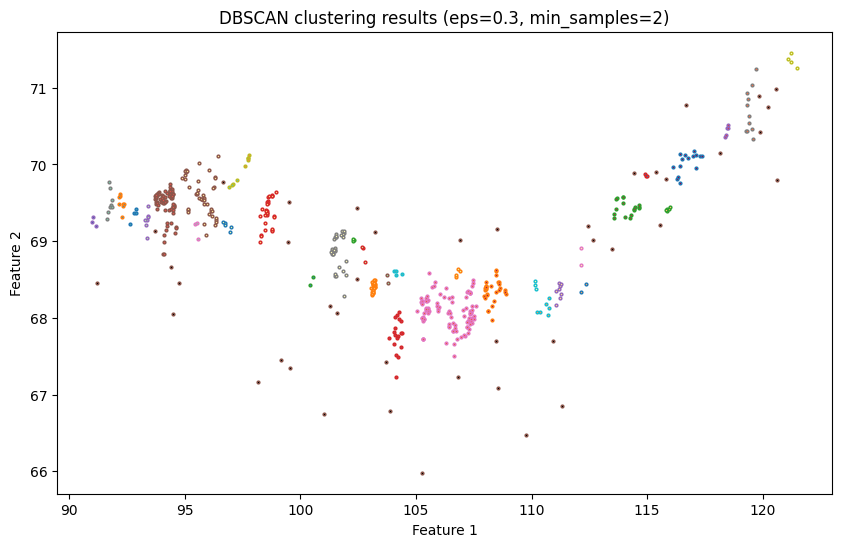

In [157]:
db_labels_m2 = apply_dbscan_and_plot(common_points_array_m, eps=0.3, min_samples=2)

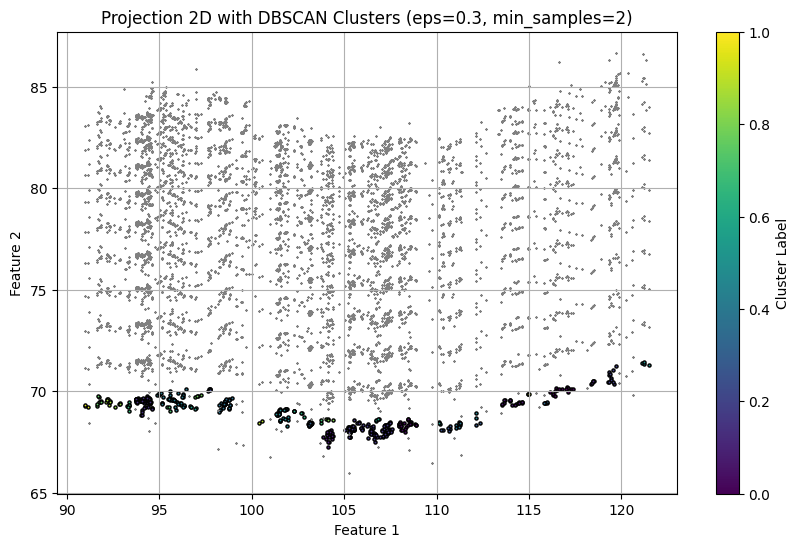

In [178]:
# Plot the original projection_2D_list with points colored according to DBSCAN clusters
plt.figure(figsize=(10, 6))
color_map = plt.get_cmap('viridis', len(set(db_labels_m2)) + 1)  # Colormap for clusters + noise

for idx, dataset in enumerate(projection_2D_list_m):
    for point in dataset:
        # Find which cluster this point belongs to
        if any(np.all(point == cp) for cp, label in zip(common_points_array_m, db_labels_m2) if label != -1):
            cluster_label_m = db_labels_m2[np.all(common_points_array_m == point, axis=1)][0]
            plt.scatter(point[0], point[1], color=color_map(cluster_label_m), marker='o', edgecolors='k', s=5)
        else:
            plt.scatter(point[0], point[1], color='gray', marker='x', s=1)  # Noise points

plt.title(f'Projection 2D with DBSCAN Clusters (eps={0.3}, min_samples={2})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [171]:
# Combine all datasets into a single array for extension
all_points_m = np.vstack(projection_2D_list_m)

In [173]:
# Extend clusters
extension_threshold = 150.0  # Adjust the extension threshold as needed
extended_labels_m = extend_clusters_with_principal_line(all_points_m, common_points_array_m, db_labels_m2, extension_threshold)

# Dictionary to store clusters
clusters_m = {i: [] for i in set(extended_labels_m) if i != -1}
noise_points_m = []

# Populate clusters and noise points
for point, label in zip(all_points_m, extended_labels_m):
    if label == -1:
        noise_points_m.append(point)
    else:
        clusters_m[label].append(point)


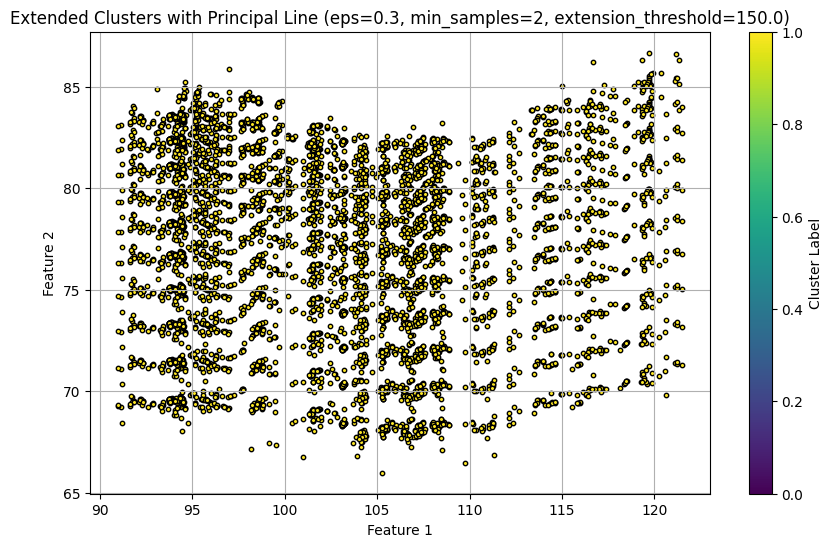

In [175]:
# Plot the original projection_2D_list with points colored according to DBSCAN clusters
plt.figure(figsize=(10, 6))
color_map = plt.get_cmap('viridis', len(set(extended_labels_m)) + 1)  # Colormap for clusters + noise

for label in set(extended_labels_m):
    if label == -1:
        color = 'gray'
        marker = 'x'
        marker_size = 1
    else:
        color = color_map(label / len(set(extended_labels_m)))
        marker = 'o'
        marker_size =10
    
    mask = (extended_labels_m == label)
    plt.scatter(all_points_m[mask][:, 0], all_points_m[mask][:, 1], color=color, marker=marker, edgecolors='k', s=marker_size)

plt.title(f'Extended Clusters with Principal Line (eps={0.3}, min_samples={2}, extension_threshold={extension_threshold})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [ ]:
extended_labels_m = []

for idx, dataset in enumerate(projection_2D_list_m):

    extended_labels_projection_m = []

    for point in dataset:
        # Find which cluster this point belongs to
        cluster_label = extended_labels_m[np.all(all_points_m == point, axis=1)][0]
        extended_labels_projection_m.append(cluster_label)

    extended_labels_2D_m.append(extended_labels_projection_m)

In [168]:
cluster_labels_3D_main2 = assign_labels_to_points(X_main_2, indices_list_m, db_labels_m2)

TypeError: 'int' object is not iterable